# setup

In [1]:
include("DelayedMatrices.jl")
include("TurtleSearch.jl")
using .DelayedMatrices, .TurtleSearch

In [2]:
include("eom.jl")
using .GoldbergerWiseEoM

In [5]:
using Plots, LaTeXStrings

In [4]:
function paramsearch(;l2=nothing, g2=nothing, FP = 1., φP = 0)
    if g2 != nothing && l2 == nothing
        function paramsearch_l2_m2(l2, m2)
            params = (m2, l2, g2)
            return errBCwithφ(FP, params, φP = φP )
        end
        return paramsearch_l2_m2
    elseif g2 == nothing && l2 != nothing
        function paramserch_g2_m2(g2, m2)
            params = (m2, l2, g2)
            return errBCwithφ(FP, params, φP = φP)
        end
        return paramserch_g2_m2
    end
end

paramsearch (generic function with 1 method)

# lm-m0

### M_IR units

In [7]:
let g2s = [250/(300/20), 20, 30, 100], yrange = (-2,1.8), xrange = (-7,-4.5), logscaled = false
    g20s = let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) ./ M_IR , (l2s), label=L"m(l^2, \gamma^0)",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        g2s*(4k+2u)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        g20 = g20s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(60,60), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs./M_IR ,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\frac{\gamma^2}{4k+2u} ="*"$(round(g20, digits=0))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!(xlabel=L"m/M_{IR}", ylabel=L"l^2")
f = plot!(dpi=300, legend=:bottomright)
savefig(f, "figs/paramsearch_lm_m0_IR.png")

"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_lm_m0_IR.png"

### M_pl units

In [40]:
let g2s = [16, 20, 30, 100], yrange = (-2,1.8), xrange = (-7,-4.5), logscaled = false
    g20s = let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) , (l2s), label=L"m(l^2, \gamma^0)",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        g2s*(4k+2u)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        g20 = g20s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(70,70), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\frac{\gamma^2}{4k+2u} ="*"$(round(g20, digits=0))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!(xlabel=L"m/M", ylabel=L"l^2")
f = plot!(dpi=300, legend=:bottomright)
savefig(f, "figs/paramsearch_lm_m0.png")

"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_lm_m0.png"

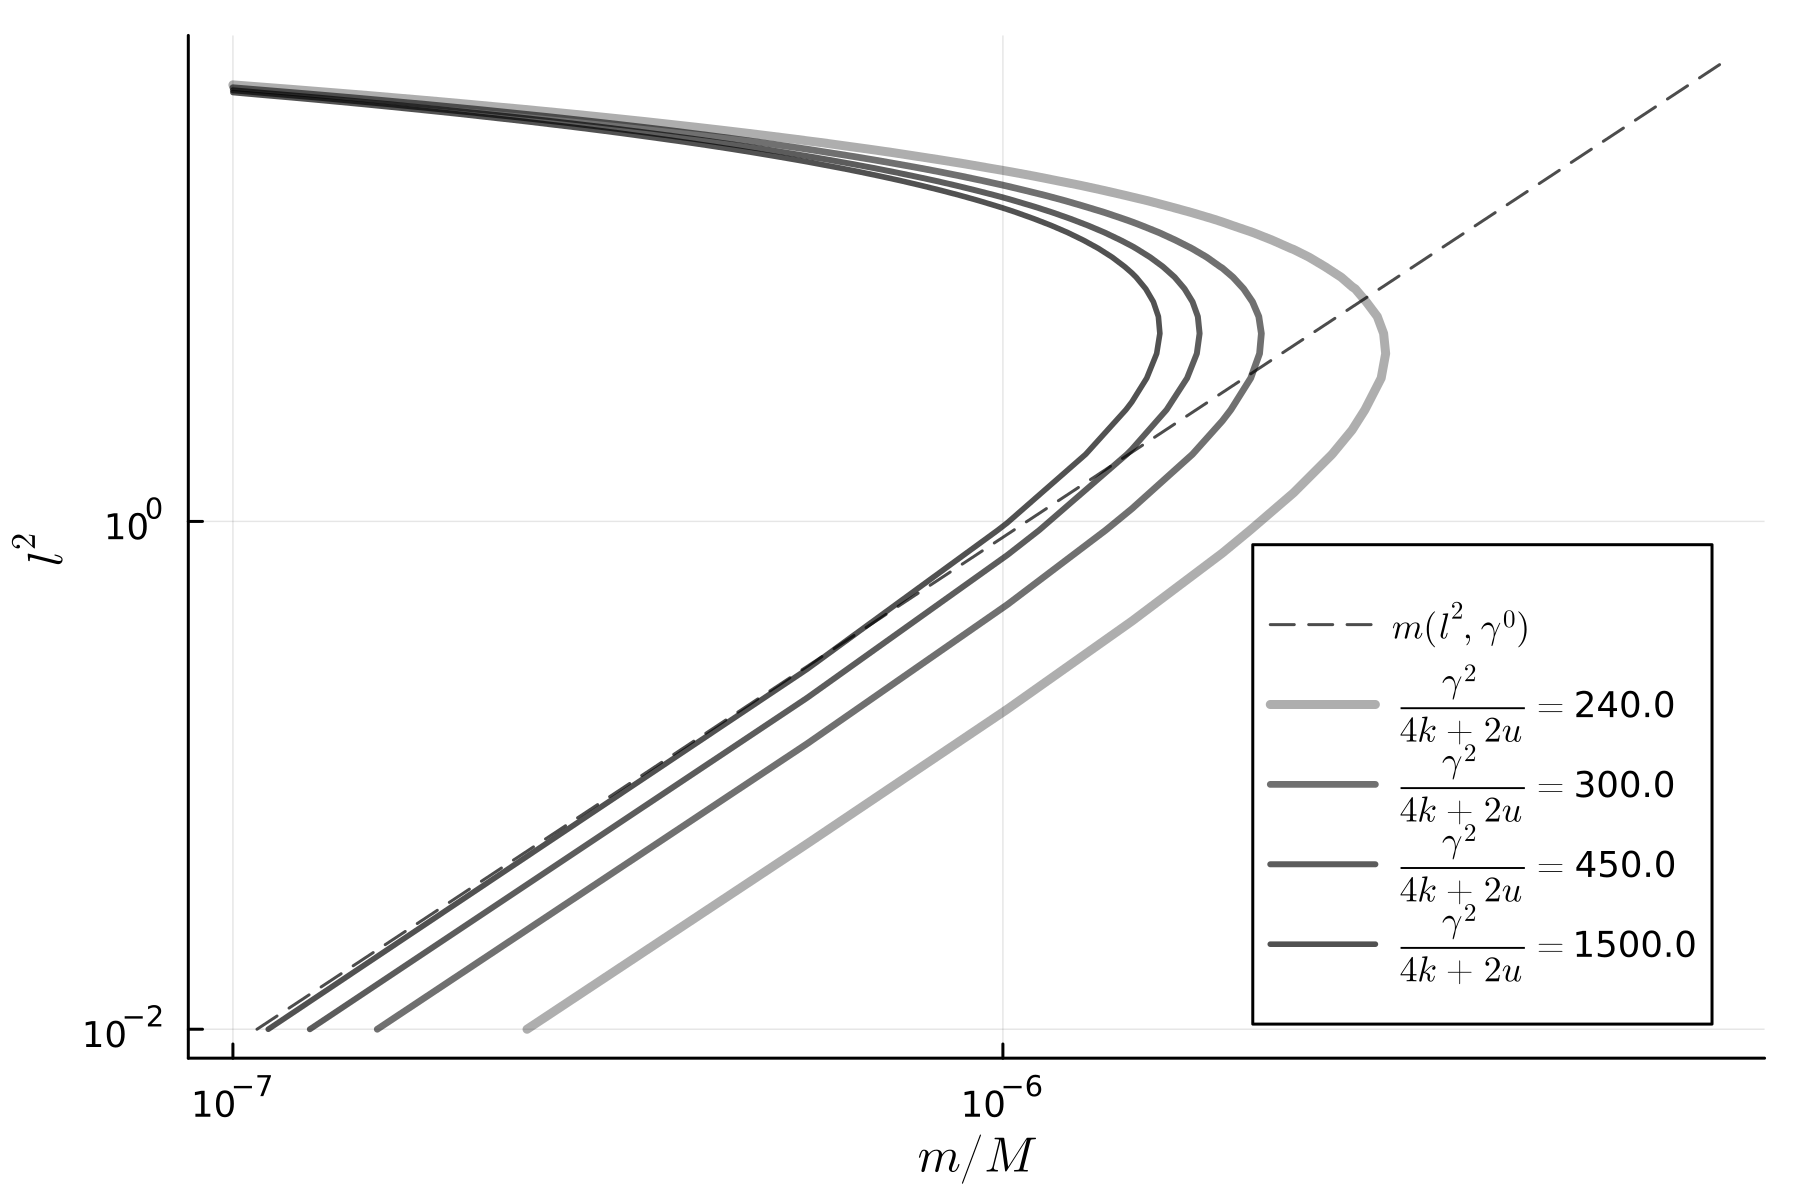

In [41]:
f

# lm-m012

### IR units

In [9]:
let g2s = [1e3], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) ./ M_IR , (l2s), label=L"m({\mathcal{O}(l^2, \gamma^0)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs ./ M_IR ,ys, alpha=0.8, c=:black, label= "radion mode", lw=2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
let g2s = [1e3], yrange = (-2,1.7), xrange = (-5,-3), logscaled = true
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)    
    end 
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,120), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)

        label = ("first KK mode", "second KK mode")
        for i=1:2
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m) && t.rpos - t.lpos != CartesianIndex(1, 0)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            pop!(xs)
            pop!(ys)
            plot!(xs ./ M_IR ,ys, alpha=0.8 - 0.2i, c=:black, label= label[i], lw=2+0.5i, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(xlabel=L"m/M_{IR}", ylabel=L"l^2", legend = :bottom, dpi=300)
savefig(f, "figs/paramsearch_lm_m012_IR.png")

"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_lm_m012_IR.png"

### Plank scale units

In [ ]:
let g2s = [1e3], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) ./ M_IR , (l2s), label=L"m({\mathcal{O}(l^2, \gamma^0)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8, c=:black, label= "radion mode", lw=2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
let g2s = [1e3], yrange = (-2,1.7), xrange = (-5,-3), logscaled = true
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)    
    end 
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,120), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)

        label = ("first KK mode", "second KK mode")
        for i=1:2
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m) && t.rpos - t.lpos != CartesianIndex(1, 0)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            pop!(xs)
            pop!(ys)
            plot!(xs,ys, alpha=0.8 - 0.2i, c=:black, label= label[i], lw=2+0.5i, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(xlabel=L"m/M", ylabel=L"l^2", legend = :bottom, dpi=300)
savefig(f, "figs/paramsearch_lm_m012.png")

"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_lm_m012.png"

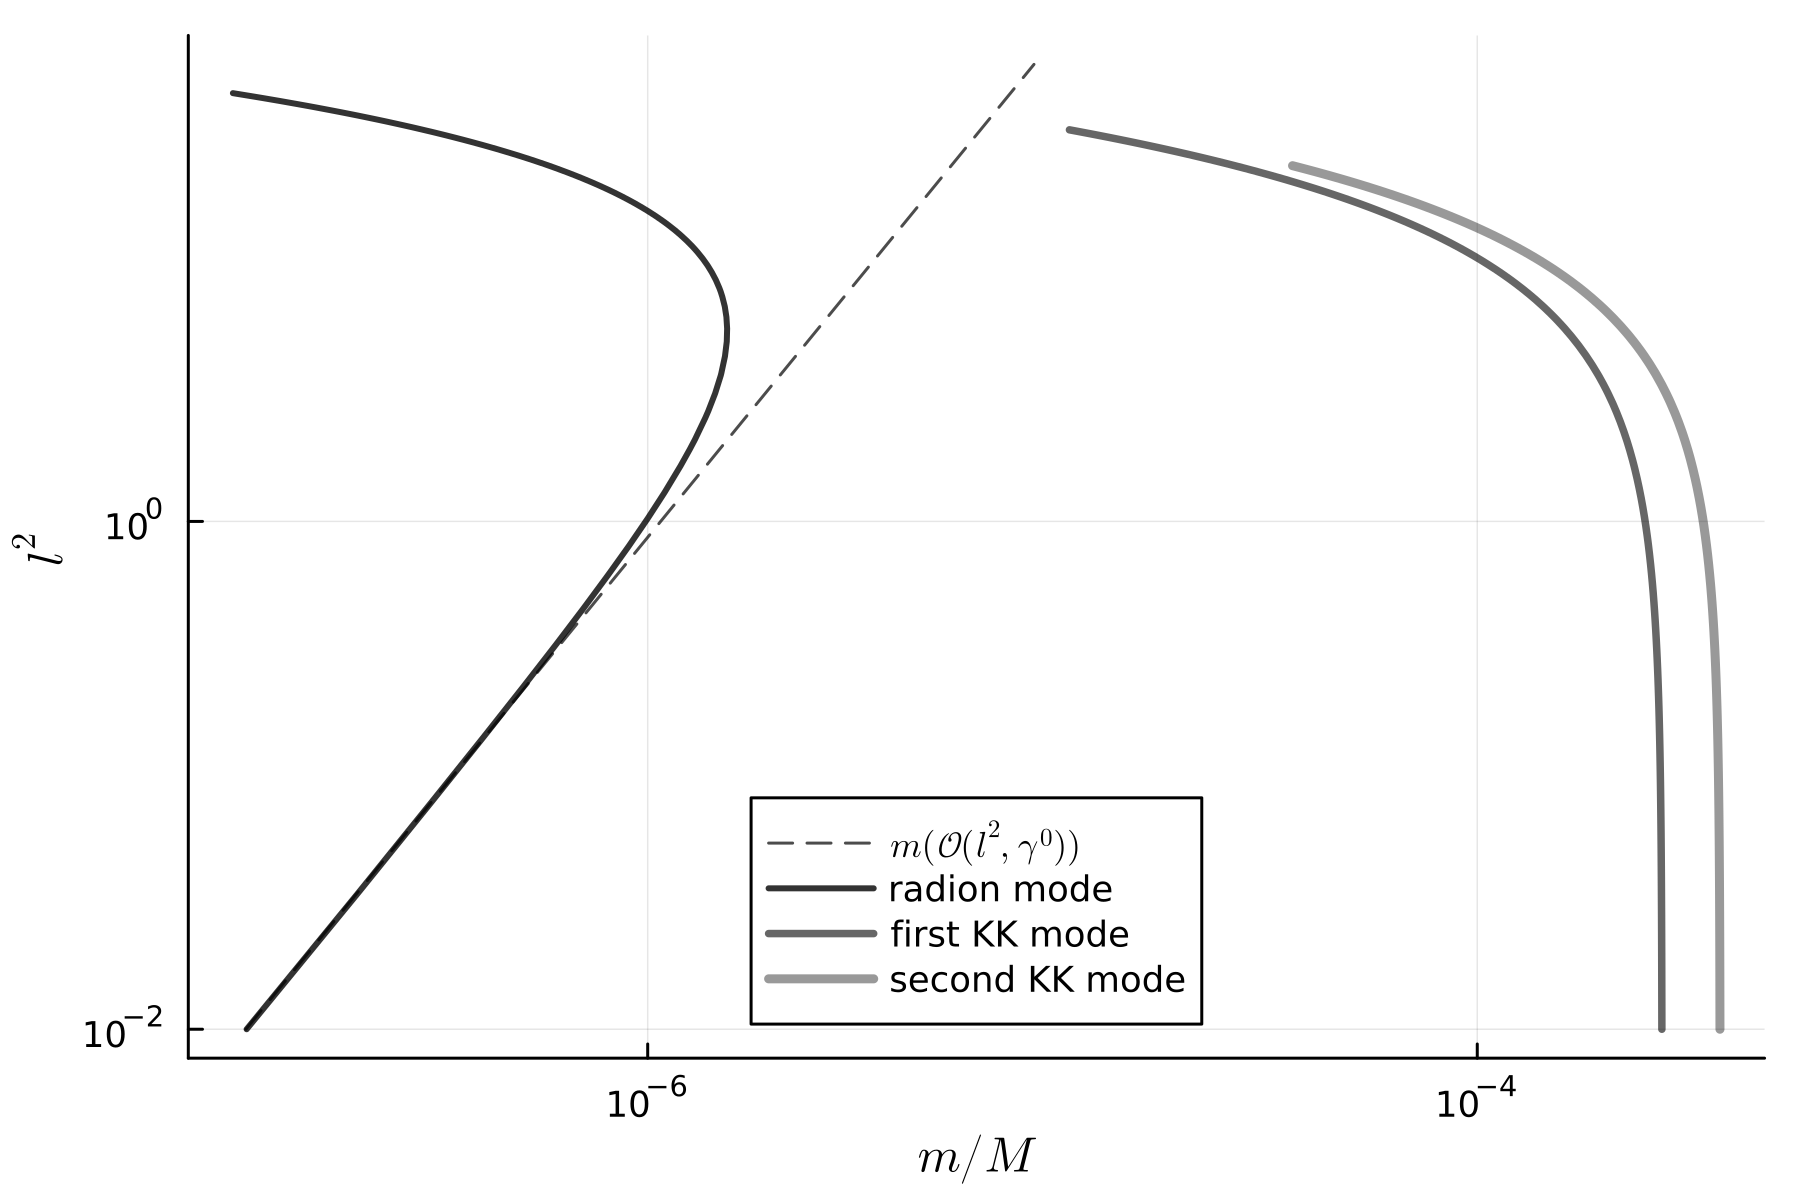

In [93]:
f

# gm

### IR scale units

In [7]:
plot()
let l2s = [1e-3], xrange = (0,2), yrange = (-9.7,-3), logscaled = true
    g0 = let yₘ = π, u = 1e-1, k=37u
        g2s0 = exp10.(range(log10(4k+2u +1e-3), 2, 100))
        ms0 = sqrt.(4l2s[1]*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) * (1 .- (4k+2u) ./g2s0))
        plot(g2s0./(4k+2u), ms0./M_IR, label=L"m({\mathcal{O}(l^2, \gamma^2)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        4k+2u
    end
    for il2 in eachindex(l2s)
        l2 = l2s[il2]
        paramsearch_g2_m2_tmp = paramsearch(l2=l2)
        m = DelayedMatrix(zeros(60,60), paramsearch_g2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        @assert poses != nothing "no seed found"

        modenames = ("radion mode", nothing, "KK modes", nothing)
        for i=1:4
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            xs = [m.xaxis(inds[1])]
            ys = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(xs,m.xaxis(inds[1]))
                push!(ys,m.yaxis(inds[2]))
            end
            plot!(xs./M_IR,ys./g0, alpha=0.8, c=:black, label=modenames[i], lw= i>2 ? 1 : 2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(ylabel=L"m/M_{IR}", xlabel=L"\gamma^2/(4k+2u)", legend=:topleft, dpi=300)
savefig(f, "figs/paramsearch_gm_m0123_IR_reversedXY.png")

(1.9952623149688828e-10, 1.8482066547775209)


(1.9952623149688828e-10, 2.6959617005513064)


(1.9952623149688828e-10, 3.093142256476068)


(1.9952623149688828e-10, 4.37144481261109)


"l:\\Sieg\\Doc\\Code\\julia\\SpectraShooter.jl\\figs\\paramsearch_gm_m0123_IR_reversedXY.png"

In [ ]:
plot()
let l2s = [1e-3], yrange = (0,2), xrange = (-9.7,-3), logscaled = true
    g0 = let yₘ = π, u = 1e-1, k=37u
        g2s0 = exp10.(range(log10(4k+2u +1e-3), 2, 100))
        ms0 = sqrt.(4l2s[1]*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) * (1 .- (4k+2u) ./g2s0))
        plot( ms0./M_IR, g2s0./(4k+2u), label=L"m({\mathcal{O}(l^2, \gamma^2)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        4k+2u
    end
    for il2 in eachindex(l2s)
        l2 = l2s[il2]
        paramsearch_g2_m2_tmp = paramsearch(l2=l2)
        m = DelayedMatrix(zeros(60,60), paramsearch_g2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        @assert poses != nothing "no seed found"

        modenames = ("radion mode", nothing, "KK modes", nothing)
        for i=1:4
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs./M_IR,ys./g0, alpha=0.8, c=:black, label=modenames[i], lw= i>2 ? 1 : 2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(xlabel=L"m/M_{IR}", ylabel=L"\gamma^2/(4k+2u)", legend=:topleft, dpi=300)
savefig(f, "figs/paramsearch_gm_m0123_IR.png")

(2.599085565606077e-8, 1.0)
(

0.00012415527459520365, 1.0)


(0.000230264450067339, 1.0)
(

0.0003348990611781509, 1.0)


"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_gm_m0123_IR.png"

### Plank scale units

In [ ]:
plot()
let l2s = [1e-3], yrange = (0,2), xrange = (-9.5,-3), logscaled = true
    g0 = let yₘ = π, u = 1e-1, k=37u
        g2s0 = exp10.(range(log10(4k+2u +1e-3), 2, 100))
        ms0 = sqrt.(4l2s[1]*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) * (1 .- (4k+2u) ./g2s0))
        plot( ms0, g2s0./(4k+2u), label=L"m({\mathcal{O}(l^2, \gamma^2)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        4k+2u
    end
    for il2 in eachindex(l2s)
        l2 = l2s[il2]
        paramsearch_g2_m2_tmp = paramsearch(l2=l2)
        m = DelayedMatrix(zeros(100,100), paramsearch_g2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        @assert poses != nothing "no seed found"
        
        for i=1:2
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys./g0, alpha=0.8, c=:black, label=nothing, lw=2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(xlabel=L"m/M", ylabel=L"\gamma^2/(4k+2u)", legend=:topright, dpi=300)
savefig(f, "figs/paramsearch_gm_m01.png")

(2.5990353372893824e-8, 1.0)
(

0.0001241699011050402, 1.0)


"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_gm_m01.png"

In [94]:
plot()
let l2s = [1e-3], yrange = (0,2), xrange = (-9.5,-3), logscaled = true
    g0 = let yₘ = π, u = 1e-1, k=37u
        g2s0 = exp10.(range(log10(4k+2u +1e-3), 2, 100))
        ms0 = sqrt.(4l2s[1]*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) * (1 .- (4k+2u) ./g2s0))
        plot( ms0, g2s0./(4k+2u), label=L"m({\mathcal{O}(l^2, \gamma^2)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
        4k+2u
    end
    for il2 in eachindex(l2s)
        l2 = l2s[il2]
        paramsearch_g2_m2_tmp = paramsearch(l2=l2)
        m = DelayedMatrix(zeros(100,100), paramsearch_g2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        @assert poses != nothing "no seed found"
        
        for i=1:4
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys./g0, alpha=0.8, c=:black, label=nothing, lw=2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
f = plot!(xlabel=L"m/M", ylabel=L"\gamma^2/(4k+2u)", legend=:topright, dpi=300)
savefig(f, "figs/paramsearch_gm_m0123.png")

(2.5990353372893824e-8, 1.0)
(

0.0001241699011050402, 1.0)


(0.00023029523861731137, 1.0)
(

0.00033487871718207093, 1.0)


"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_gm_m0123.png"

In [90]:
f = plot!(xlabel=L"m/M", ylabel=L"\gamma^2/(4k+2u)", legend=:topright, dpi=300)
savefig(f, "figs/paramsearch_gm_m01.png")

"/Users/outk/Documents/Codes/Julia/22-7/spectraShooter/figs/paramsearch_gm_m01.png"

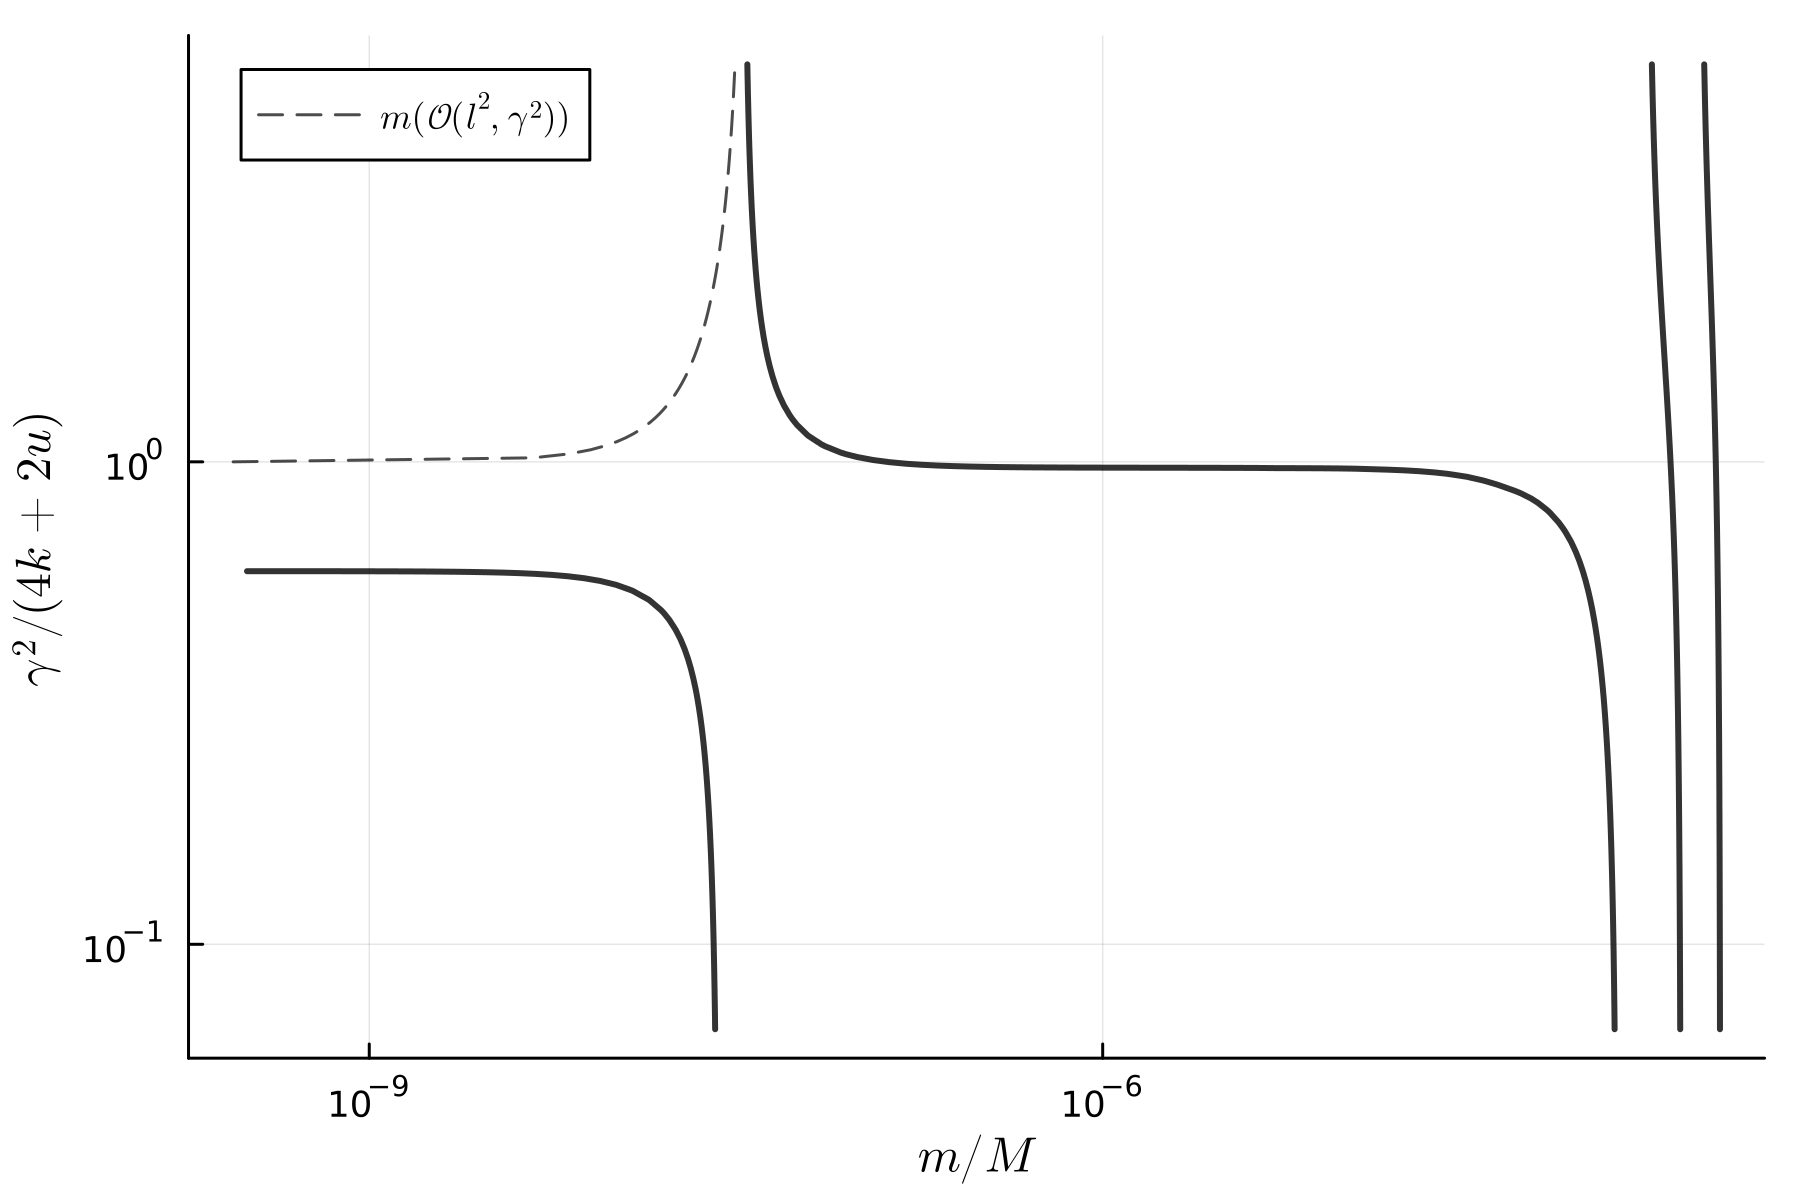

In [96]:
f = plot!(xlabel=L"m/M", ylabel=L"\gamma^2/(4k+2u)", legend=:topleft, dpi=300)
savefig(f, "figs/paramsearch_gm_m0123.png")
f

In [71]:
paramsearch_g2_m2 = paramsearch(l2=1e-2)
paramsearch_g2_m2(1e0, 1e-5)

1.1629713553988992e13

In [74]:
paramsearch_g2_m2(1e-1, 1e-7)

5.215337026619312e8

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: Invalid negative or zero value -6.55679111217793 found at series index 1 for log10 based xscale
└ @ Plots /Users/outk/.julia/packages/Plots/9Q9pN/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191


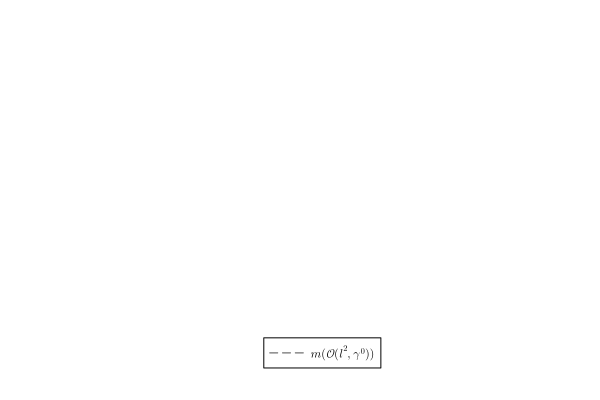

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: Invalid negative or zero value -6.55679111217793 found at series index 1 for log10 based xscale
└ @ Plots /Users/outk/.julia/packages/Plots/9Q9pN/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/outk/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: Invalid negative or zero value -6.55679111217793 found at series index 1 for log10 based xscale
└ @ Plots /Users/outk/.julia/packages/Plots/9Q9pN/src/utils.jl:106


In [65]:
plot!(legend=:bottom)

In [ ]:
let l2s = [100], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\gamma^2 ="*"$(round(g2, digits=1))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end

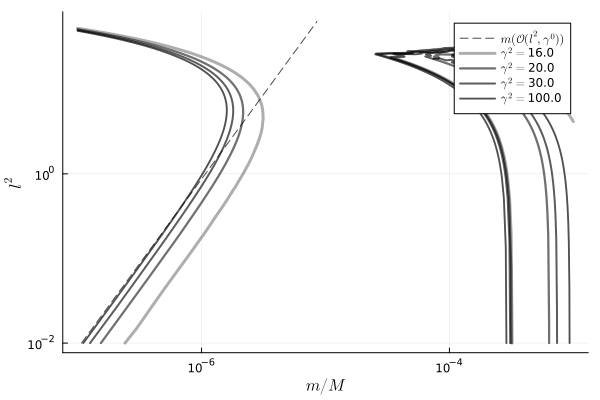

In [21]:
let g2s = [16, 20, 30, 100], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) , (l2s), label=L"m({\mathcal{O}(l^2, \gamma^0)})",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\gamma^2 ="*"$(round(g2, digits=1))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
let g2s = [16, 20, 30, 100], yrange = (-2,1.7), xrange = (-5.5,-3), logscaled = false
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)    
    end 
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!(xlabel=L"m/M", ylabel=L"l^2")

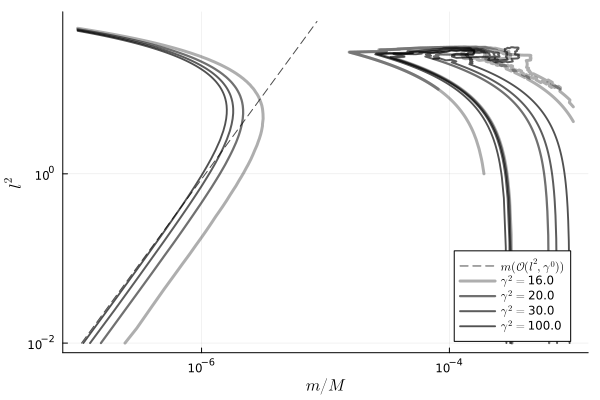

In [25]:
let g2s = [16], yrange = (1,1.7), xrange = (-5.5,-3), logscaled = false
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)    
    end 
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!()

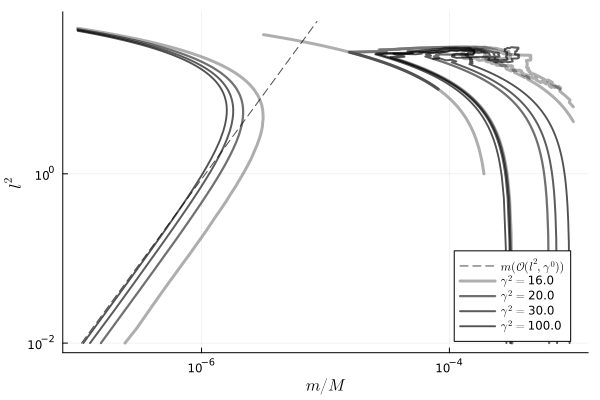

In [26]:
let g2s = [16], yrange = (1,1.7), xrange = (-5.5,-3), logscaled = true
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)    
    end 
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!()

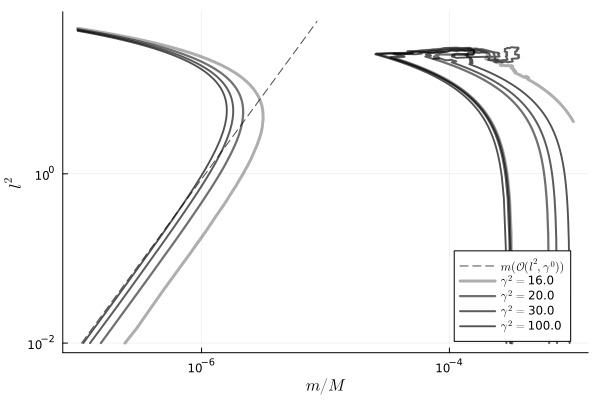

In [22]:
plot!(legend=:bottomright)

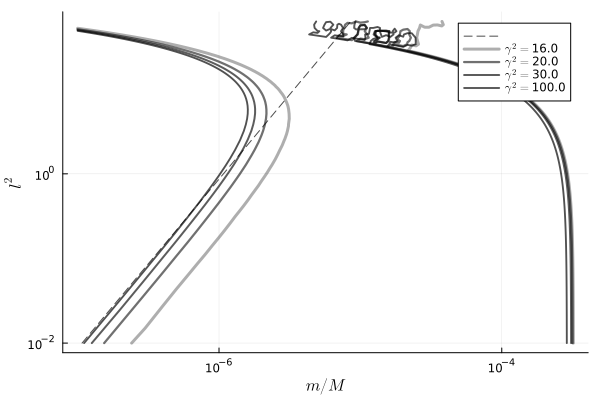

ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


In [20]:
let g2s = [16, 20, 30, 100], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
        plot( sqrt.(4l2s*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) ) , (l2s), label=L"m_{\mathcal O(l^2, \gamma^0)}",lw=1, c=:black, line=:dash, alpha=0.7, xaxis=:log10, yaxis=:log10)
    end
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\gamma^2 ="*"$(round(g2, digits=1))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
let g2s = [16, 20, 30, 100], yrange = (-2,1.8), xrange = (-6,-3), logscaled = true
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!(xlabel=L"m/M", ylabel=L"l^2")

In [ ]:
let l2s = [1e-1], yrange = (-2,1.8), xrange = (-7,-5), logscaled = false
    let yₘ = π, u = 1e-1, k=37u
        if logscaled == false
            xrange, yrange = exp10.(xrange), exp10.(yrange)
            l2s = range(yrange..., 5)
        else
            l2s = exp10.(range(yrange..., 5))     
        end 
    end
    for il2 in eachindex(l2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= i==1 ? L"\gamma^2 ="*"$(round(g2, digits=1))" : nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
let g2s = [16, 20, 30, 100], yrange = (-2,1.8), xrange = (-6,-3), logscaled = true
    for ig2 in eachindex(g2s)
        g2 = g2s[ig2]
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(100,100), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        for i=1:1
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            # println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(xs,ys, alpha=0.8(1- 0.6/ig2), c=:black, label= nothing, lw=1.5 + 1.5/ig2, xaxis=:log10, yaxis=:log10)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            # poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!(xlabel=L"m/M", ylabel=L"l^2")

In [2]:
using LaTeXStrings
L"l² = \frac{4l²(2k+u)u²}{3k}(1-e^{2kyₘ})/(1-e^{(4k+2u)yₘ})"

L"$l² = \frac{4l²(2k+u)u²}{3k}(1-e^{2kyₘ})/(1-e^{(4k+2u)yₘ})$"

In [9]:
L"\frac m M"

L"$\frac m M$"

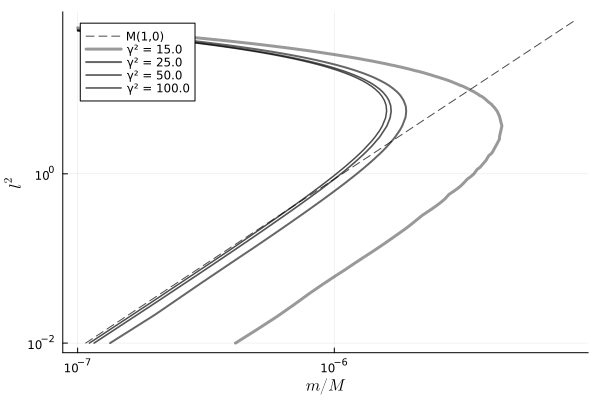

In [12]:
plot!(xlabel=L"m/M")

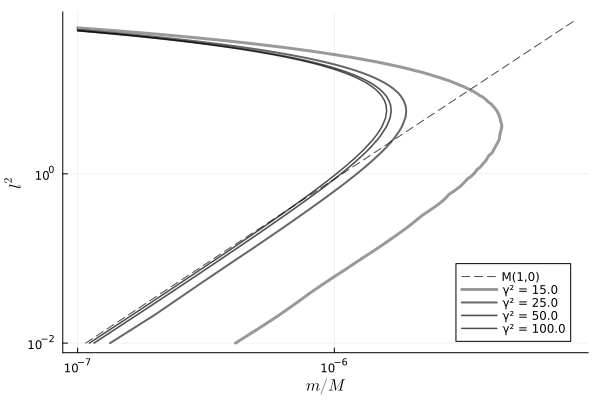

In [13]:
plot!(legend=:bottomright)

(7.645166507224443e-5, 1.0)
(

0.00019796844971264573, 1.0)


(7.644949816249559e-5, 1.0)
(

0.00019796844971264573, 1.0)


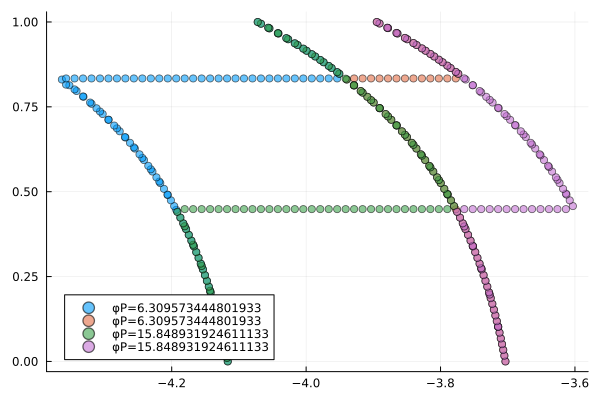

In [25]:
using Plots

let 
    plot()
    for a in exp10.(range(0.8,1.2,2))
        paramsearch_l2_m2_tmp = paramsearch(g2=1e1, φP = a)
        m = DelayedMatrix(zeros(60,120), paramsearch_l2_m2_tmp,(0,1),(-5,-3.5))
        # m = DelayedMatrix(zeros(30,50), paramsearch_l2_m2_tmp, (1e-4,1),(1e-8,1e-3), logscaled = false)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:2
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            scatter!(log10.(xs),log10.(ys), alpha=0.6, label="φP=$a")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!()

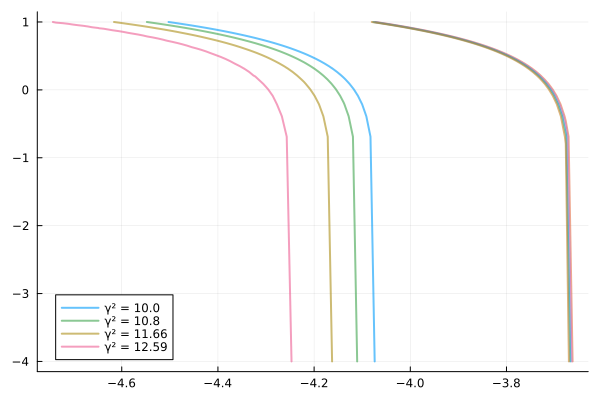

In [39]:
let g2s = exp10.(range(1,1.1,4)), yrange = (-4,1), xrange = (-5,-3), logscaled = false
    plot()
    if logscaled == false
        xrange, yrange = exp10.(xrange), exp10.(yrange)
    end
    for g2 in g2s
        paramsearch_l2_m2_tmp = paramsearch(g2=g2)
        m = DelayedMatrix(zeros(50,80), paramsearch_l2_m2_tmp,yrange, xrange, logscaled = logscaled)
        poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
        for i=1:2
            t = Turtles(max(poses...))
            inds = bisearch(t, m)
            ys = [m.xaxis(inds[1])]
            xs = [m.yaxis(inds[2])]
            println((xs[1], ys[1]))
            while nothing != next!(t, m)
                inds = bisearch(t, m)
                push!(ys,m.xaxis(inds[1]))
                push!(xs,m.yaxis(inds[2]))
            end
            plot!(log10.(xs),log10.(ys), alpha=0.6, label= i==1 ? "γ² = $(round(g2, digits=2))" : nothing, lw=2)
            # scatter!(log10.(xs),log10.(ys), alpha=0.6, label="γ² = $g2")
            poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
        end
    end
end
plot!()

In [4]:
m = DelayedMatrix(zeros(50,100), paramsearch_l2_m2, (-4,1),(-8,-3));

In [5]:
let φP = 0
    poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
    t = Turtles(max(poses...))
    inds = bisearch(t, m)
    ys = [m.xaxis(inds[1])]
    xs = [m.yaxis(inds[2])]
    println((xs[1], ys[1]))
    while nothing != next!(t, m)
        inds = bisearch(t, m)
        push!(ys,m.xaxis(inds[1]))
        push!(xs,m.yaxis(inds[2]))
    end
    using Plots
    scatter(log10.(xs),log10.(ys))
end

UndefVarError: UndefVarError: φP not defined

Some of the types have been truncated in the stacktrace for improved reading. To emit complete information
in the stack trace, evaluate `TruncatedStacktraces.VERBOSE[] = true` and re-run the code.


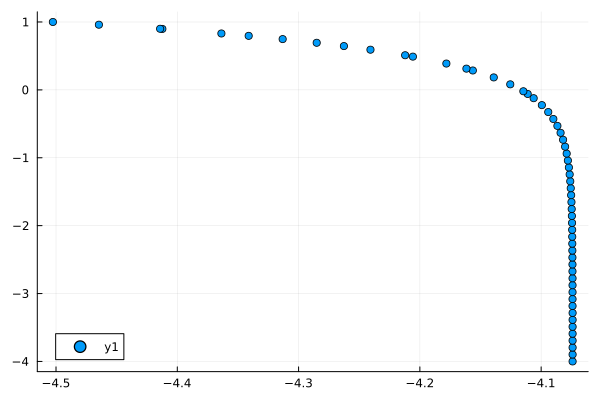

In [ ]:
for φP in range(1e-3,1e-2,5)
    poses = findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
    t = Turtles(max(poses...))
    inds = bisearch(t, m)
    ys = [m.xaxis(inds[1])]
    xs = [m.yaxis(inds[2])]
    println((xs[1], ys[1]))
    while nothing != next!(t, m)
        inds = bisearch(t, m)
        push!(ys,m.xaxis(inds[1]))
        push!(xs,m.yaxis(inds[2]))
    end

In [15]:
@show poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

poses = findfirstseed!(m, map((x->begin
                    #= l:\Sieg\Doc\Code\julia\SpectraShooter.jl\deploy.ipynb:1 =#
                    x + CartesianIndex(0, 1)
                end), poses)...) = (CartesianIndex(1, 173), CartesianIndex(1, 174))


(0.00021751204673238058, 0.0001)


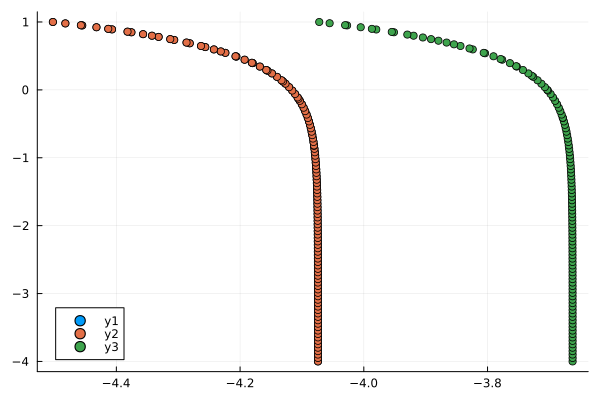

In [16]:
using Plots
scatter!(log10.(xs),log10.(ys))

In [17]:
@show poses = findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
t = Turtles(max(poses...))
inds = bisearch(t, m)
ys = [m.xaxis(inds[1])]
xs = [m.yaxis(inds[2])]
println((xs[1], ys[1]))
while nothing != next!(t, m)
    inds = bisearch(t, m)
    push!(ys,m.xaxis(inds[1]))
    push!(xs,m.yaxis(inds[2]))
end

poses = findfirstseed!(m, map((x->begin
                    #= l:\Sieg\Doc\Code\julia\SpectraShooter.jl\deploy.ipynb:1 =#
                    x + CartesianIndex(0, 1)
                end), poses)...) = (CartesianIndex(1, 180), CartesianIndex(1, 181))


(0.0003266252392798774, 0.0001)


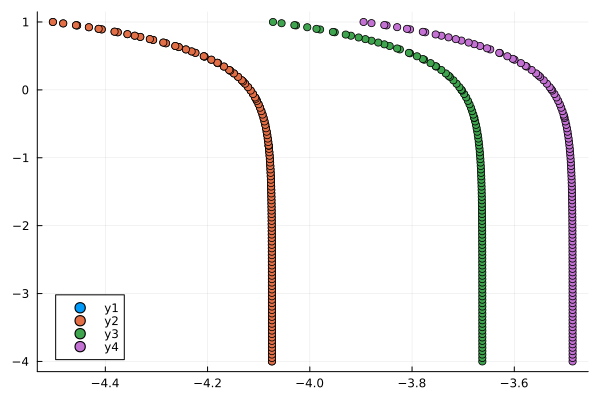

In [18]:
using Plots
scatter!(log10.(xs),log10.(ys))

# what is the IR scale?

In [1]:
exp(-3.7π)

8.949679661920618e-6

In [6]:
M_IR

8.949679661920618e-6